<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/BT_colab_so_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
url_train = 'http://cs.uit.edu.vn/data2.txt?fbclid=IwAR11i7MdMWgqg6i1ab0z3C1VRJLM_6BpnjlpS_hZmNhlBJeYjDihp479fnU'
url_test_1 = 'http://cs.uit.edu.vn/data3.txt?fbclid=IwAR0xQwlnCNoEWthoc8txwpYSHFuf-lo6KOAXMzum53EWy89fJChAaUqGzB8'
url_test_2 = 'http://cs.uit.edu.vn/data4.txt?fbclid=IwAR0fXuM2Q29pRBldP-sv9znzwYQCRCGe-VHLSvGeUcrvhkFR2UhxtCddIZQ'

In [9]:
data_train = pd.read_csv(url_train, header=None, names = ['x', 'y'])
data_test_1 = pd.read_csv(url_test_1, header=None, names = ['x', 'y'])
data_test_2 = pd.read_csv(url_test_2, header=None, names = ['x', 'y'])
X_train, y_train = np.array(data_train['x']).reshape(-1,1), np.array(data_train['y'])
X_test_1, y_test_1 = np.array(data_test_1['x']).reshape(-1,1), np.array(data_test_1['y'])
X_test_2, y_test_2 = np.array(data_test_2['x']).reshape(-1,1), np.array(data_test_2['y'])

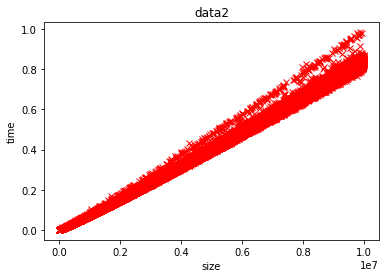

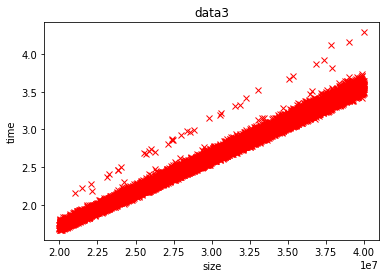

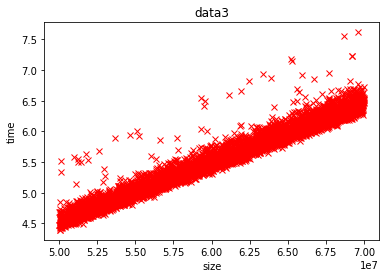

In [15]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "x", color='red')
plt.title("data2")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

plt.plot(X_test_1, y_test_1, "x", color='red')
plt.title("data3")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

plt.plot(X_test_2, y_test_2, "x", color='red')
plt.title("data3")
plt.xlabel('size')
plt.ylabel('time')
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error as mse
def showMSE(estimated, test):
  value = mse(estimated, test)
  print('Mean squared error:', value)

est = model.predict(X_train)
showMSE(est, y_train)

estimated_1 = model.predict(X_test_1)
showMSE(estimated_1, y_test_1)

estimated_2 = model.predict(X_test_2)
showMSE(estimated_2, y_test_2)

Mean squared error: 0.00014337728721748835
Mean squared error: 0.020664949397549082
Mean squared error: 0.22348476817426036


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Theta_0: ', model.coef_)
print('Theta_1: ', model.intercept_)

Theta_0:  [8.45569856e-08]
Theta_1:  -0.015895527000496013


In [42]:
def drawResult(X, y, estmated, name):
  plt.plot(X, y, "x", color='red')
  plt.plot(X, estmated)
  plt.title(name)
  plt.xlabel('size')
  plt.ylabel('time')
  plt.show()

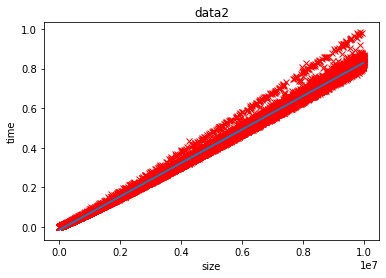

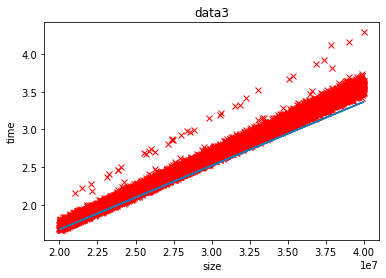

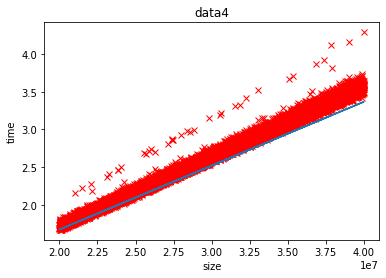

In [45]:
drawResult(X_train, y_train, est, 'data2')
drawResult(X_test_1, y_test_1, estimated_1, 'data3')
drawResult(X_test_1, y_test_1, estimated_1, 'data4')